## Course : Advanced Certificate Program in Machine Learning & Cloud

## Module : Capstone Project - User Demographics Prediction using Telecom dataset

## Authors : Sanjana Mantri

# Objective

A data preparation was carried out earlier in HIVE and prepared data wasstored in the S3 bucket. 
Three data files were created and stored in S3

*   non_events.csv
*   events.csv
*   appdata.csv

In this part of the exercise the following activities will be carried out

<B> This notebook file is meant for performing the following
    
* TASK 1 -  Reading Data 
* TASK 2 -  Cleaning Data 
* TASK 3 -  Basic EDA and Visualizations
 
Other tasks will be performed in seperate notebooks
</B>

## TASK 1 - Reading Data 

* Reading data from S3 in EC2
* Reading CSVs in data frame

## TASK 2 -  Cleaning Data 

* Null checks
* Imputations
* Handling Categorical, Binary and Numerical columns
* Check for high cardinality columns
* Handling categorical columns having large values

## TASK 3 - Basic EDA and Visualization, Feature Engineering Ideas

*  Plot appropriate graphs which represent the distribution of Age and gender in the Dataset [Univariate]
*  Boxplot analysis for gender and Age [Bivariate]
*  Plot percentage of device_ids with and without event data
*  Graph representing the distribution of events on different days of a week
*  Graph representing the distribution of events per hour [ For one-week data]
*  The difference in the distribution of events per hour for Male and Females?  [Show the difference using an appropriate chart 
   for one-week data] 
*  Is there any difference in the distribution of Events for different Age Groups over different days of the week? [Consider 
   the age groups as 0-24, 25-32, 33-45, 46+]
*  Stacked bar chart for top 10 mobile brands across male and female consumers
*  Chart representing ten frequent applications and their respective male and female percentage
*  Top 10  Mobile Phone Brand  by age groups [Consider the age groups as 0-24, 25-32, 33-45, 46+]

In [9]:
# import libraries
# 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# **TASK 1 - Reading Data**

## 1.1 Download data from s3 bucket

In [11]:
# download non_events.csv from s3 bucket
# 
!aws s3 cp s3://capstone-sanjanameghna/non_events.csv .

download: s3://capstone-sanjanameghna/non_events.csv to ./non_events.csv


In [12]:
# download events.csv from s3 bucket
#
!aws s3 cp s3://capstone-sanjanameghna/events.csv .

download: s3://capstone-sanjanameghna/events.csv to ./events.csv  


In [13]:
# download appdata.csv from s3 bucket
#
!aws s3 cp s3://capstone-sanjanameghna/appdata.csv .

download: s3://capstone-sanjanameghna/appdata.csv to ./appdata.csv 


## 1.2  Reading CSVs into pandas dataframe

#### 1.2.1 Load Non Events dataset into pandas dataframe

In [14]:
# Read non_events dataset into pandas dataframe
# 
dfnev = pd.read_csv('non_events.csv', encoding='utf-8')

In [15]:
# Verify dataset shape
#
dfnev.shape

(74840, 6)

In [16]:
# Verify column types
# 
dfnev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74840 entries, 0 to 74839
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   non_event_data_external.device_id     74840 non-null  int64 
 1   non_event_data_external.phone_brand   74840 non-null  object
 2   non_event_data_external.device_model  74840 non-null  object
 3   non_event_data_external.gender        74840 non-null  object
 4   non_event_data_external.age           74840 non-null  int64 
 5   non_event_data_external.group_train   74840 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.4+ MB


In [17]:
# Rename column headings
# 
dfnev.rename(columns={
                'non_event_data_external.device_id' : 'device_id',
                'non_event_data_external.phone_brand' : 'phone_brand',
                'non_event_data_external.device_model' : 'device_model',
                'non_event_data_external.gender' : 'gender',
                'non_event_data_external.age' : 'age',
                'non_event_data_external.group_train' : 'group_train'
                }, inplace = True
            )

In [18]:
# Display first 5 records
#

dfnev.head(5)

,device_id,phone_brand,device_model,gender,age,group_train
0,1845358998536310000,meitu,2,F,25,F25-32
1,3126957642374570000,meitu,2,M,27,M25-32
2,6005031767544890000,meitu,2,F,30,F25-32
3,7862170554164260000,meitu,2,F,22,F0-24
4,-1463646610464190000,meitu,2,F,24,F0-24


In [19]:
# Checking binary column 'gender'
#
dfnev['gender'].value_counts(dropna=False)

M    48035
F    26805
Name: gender, dtype: int64

In [20]:
# Checking ordinal column group_train
# 
dfnev['group_train'].value_counts(dropna=False)

M25-32    19901
M32+      16316
M0-24     11818
F25-32    10741
F32+       9780
F0-24      6284
Name: group_train, dtype: int64

In [21]:
dfnev[dfnev.age > 32]

,device_id,phone_brand,device_model,gender,age,group_train
11,3850960887861590000,meitu,2,M,34,M32+
15,1323187103995530000,meitu,2,M,34,M32+
16,7163627422543500000,meitu,2,F,54,F32+
17,1312435195549850000,meitu,2,F,37,F32+
19,-5656200008905250000,youmi,3,F,41,F32+
...,...,...,...,...,...,...
74824,2033746267945220000,asus,ZenFone 5,F,37,F32+
74828,-5986444829585820000,asus,ZenFone 5,M,33,M32+
74833,-5816542174733950000,asus,ZenFone Max,F,33,F32+
74835,-5876986818792990000,asus,ZenFone Max,M,35,M32+


In [22]:
# Checking categorical column device_model
# 
dfnev['device_model'].value_counts(dropna=False)

xnote                 3016
MI 3                  2304
MI 2S                 2138
Galaxy Note 3         2070
MI 4                  1914
                      ... 
BM003                    1
Galaxy Tab A 8.0         1
Galaxy Tab 2 P5100       1
8712S                    1
X6666                    1
Name: device_model, Length: 1438, dtype: int64

In [23]:
# Checking categorical column phone_brand
# 
dfnev['phone_brand'].value_counts(dropna=False)

Xiaomi     17337
samsung    13706
Huawei     13001
OPPO        5802
vivo        5658
           ...  
fs             1
ZOYE           1
mole           1
Ctyon          1
pner           1
Name: phone_brand, Length: 97, dtype: int64

#### 1.2.1 Load Events dataset into pandas dataframe

In [24]:
total_rows = dfnev.shape[0]
nullDataSeries = dfnev.isnull().sum()
nullDataSeries = nullDataSeries[nullDataSeries > 0].sort_values(ascending = False).apply(lambda x: (x/total_rows)*100 )
nullDataSeries

Series([], dtype: int64)

In [25]:
# read events dataset into pandas dataframe
# 
dfev = pd.read_csv('events.csv', encoding='utf-8')

In [26]:
# verify dataset shape
#
dfev.shape

(1215598, 8)

In [27]:
# verify column types
# 
dfev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215598 entries, 0 to 1215597
Data columns (total 8 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   events_train_external.device_id    1215598 non-null  int64  
 1   events_train_external.event_id     1215598 non-null  int64  
 2   events_train_external.event_time   1215598 non-null  object 
 3   events_train_external.latitude     1215598 non-null  float64
 4   events_train_external.longitude    1215598 non-null  float64
 5   events_train_external.gender       1215598 non-null  object 
 6   events_train_external.age          1215598 non-null  int64  
 7   events_train_external.group_train  1215598 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 74.2+ MB


In [28]:
# rename column headings
# 
dfev.rename(columns={
                'events_train_external.device_id' : 'device_id',
                'events_train_external.event_id' : 'event_id',
                'events_train_external.event_time' : 'event_time',
                'events_train_external.latitude' : 'latitude',
                'events_train_external.longitude' : 'longitude',
                'events_train_external.gender' : 'gender',
                'events_train_external.age' : 'age',
                'events_train_external.group_train' : 'group_train'
                }, inplace = True
            )

In [29]:
# display first 5 records
# 
dfev.head(5)

,device_id,event_id,event_time,latitude,longitude,gender,age,group_train
0,4676982795249940000,2958924,2016-05-01 22:03:46,113.24,22.85,M,52,M32+
1,4782582047729160000,2958931,2016-05-01 22:24:09,114.47,38.03,M,36,M32+
2,2181284491650730000,2958933,2016-05-01 22:24:44,125.66,43.02,M,28,M25-32
3,4221762657972680000,2958935,2016-05-01 22:40:47,115.19,24.07,F,19,F0-24
4,-2990318111507320000,2958938,2016-05-01 21:59:08,0.00,0.00,F,32,F25-32


In [30]:
# Checking binary column 'gender'
#
dfev['gender'].value_counts(dropna=False)

M    864306
F    351292
Name: gender, dtype: int64

In [31]:
# Checking ordinal column group_train
# 
dfev['group_train'].value_counts(dropna=False)

M32+      387589
M25-32    346988
F32+      163410
F25-32    132532
M0-24     129729
F0-24      55350
Name: group_train, dtype: int64

In [32]:
# Checking zero values count in columns latitude & longitude 
#
dfev.loc[(~((dfev.latitude > 0) & (dfev.longitude > 0)))]

,device_id,event_id,event_time,latitude,longitude,gender,age,group_train
4,-2990318111507320000,2958938,2016-05-01 21:59:08,0.0,0.0,F,32,F25-32
10,5838192187148920000,2958950,2016-05-01 22:12:46,0.0,0.0,M,28,M25-32
12,4737717997133900000,2958954,2016-05-01 22:30:38,0.0,0.0,M,33,M32+
17,9219842210460030000,2958969,2016-05-01 22:41:54,0.0,0.0,F,29,F25-32
38,-3082540067142970000,2959019,2016-05-01 22:00:11,0.0,0.0,M,73,M32+
...,...,...,...,...,...,...,...,...
1215583,2865406474920660000,2958881,2016-05-07 21:13:19,0.0,0.0,M,40,M32+
1215587,-3700868433721280000,2958896,2016-05-01 22:28:16,0.0,0.0,F,26,F25-32
1215589,-4968824142785510000,2958899,2016-05-01 22:52:18,0.0,0.0,F,30,F25-32
1215593,1727035210770580000,2958907,2016-05-01 22:36:31,0.0,0.0,F,23,F0-24


#### 1.2.3 Load Appdata dataset into pandas dataframe

In [33]:
# read appdata dataset into pandas dataframe
# To avoid the error 'EOF inside string starting at row....', caused by a string that contained within it a single quote mark,
# the option quoting=csv.QUOTE_NONE is used
import csv
dfapp = pd.read_csv('appdata.csv',quoting=csv.QUOTE_NONE, encoding='utf-8')

In [34]:
# verify dataset shape
#
dfapp.shape

(55614759, 6)

In [35]:
# Verify column types
# 
dfapp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55614759 entries, 0 to 55614758
Data columns (total 6 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   app_data_external.event_id      int64  
 1   app_data_external.app_id        int64  
 2   app_data_external.is_installed  float64
 3   app_data_external.is_active     float64
 4   app_data_external.label_id      float64
 5   app_data_external.category      object 
dtypes: float64(3), int64(2), object(1)
memory usage: 2.5+ GB


In [36]:
# rename column headings
#
dfapp.rename(columns={
                'app_data_external.event_id' : 'event_id',
                'app_data_external.app_id' : 'app_id',
                'app_data_external.is_installed' : 'is_installed',
                'app_data_external.is_active' : 'is_active',
                'app_data_external.label_id' : 'label_id',
                'app_data_external.category' : 'category'
                }, inplace = True
            )

In [37]:
# display first 5 records
# 
dfapp.head(5)

,event_id,app_id,is_installed,is_active,label_id,category
0,2960967,8557198901083791098,1.0,1.0,548.0,Industry tag
1,2960967,8557198901083791098,1.0,1.0,204.0,sports and gym
2,2960967,8557198901083791098,1.0,1.0,172.0,IM
3,2960967,8557198901083791098,1.0,1.0,223.0,convenience services
4,2960967,8557198901083791098,1.0,1.0,206.0,Medical


In [38]:
total_rows = dfapp.shape[0]
nullDataSeriesApp = dfapp.isnull().sum()
nullDataSeriesApp = nullDataSeriesApp[nullDataSeriesApp > 0].sort_values(ascending = False).apply(lambda x: (x/total_rows)*100 )
nullDataSeriesApp

category        0.000002
label_id        0.000002
is_active       0.000002
is_installed    0.000002
dtype: float64

## TASK 2 - Cleaning Data

### 2.1 Cleaning non-events dataset

In [40]:
dfnev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74840 entries, 0 to 74839
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     74840 non-null  int64 
 1   phone_brand   74840 non-null  object
 2   device_model  74840 non-null  object
 3   gender        74840 non-null  object
 4   age           74840 non-null  int64 
 5   group_train   74840 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.4+ MB


In [41]:
# device_model column contains junk characters, need to clean up the junk characters
# 
dfnev.device_model.unique().tolist()

['2',
 '3',
 '201',
 '1100',
 '1105',
 '1107',
 '3000',
 '3005',
 '3007',
 '5217',
 '5219',
 '5261',
 '5263',
 '5310',
 '5311',
 '5316',
 '5360',
 '5832',
 '5872',
 '5876',
 '5879',
 '5890',
 '5891',
 '5892',
 '5930',
 '5950',
 '5951',
 '5956',
 '6607',
 '7060',
 '7061',
 '7105',
 '7230',
 '7231',
 '7235',
 '7236',
 '7251',
 '7260',
 '7268',
 '7269',
 '7270',
 '7275',
 '7295',
 '7296',
 '7320',
 '7372',
 '7605',
 '8017',
 '8021',
 '8029',
 '8056',
 '8060',
 '8070',
 '8079',
 '8085',
 '8089',
 '8105',
 '8122',
 '8150',
 '8185',
 '8190',
 '8195',
 '8295',
 '8702',
 '8705',
 '8707',
 '8712',
 '8713',
 '8715',
 '8717',
 '8720',
 '8721',
 '8722',
 '8729',
 '8732',
 '8736',
 '8750',
 '8800',
 '9150',
 '9180',
 ':UOOGOUT1',
 '2016GalAxyA5',
 '2016GalAxyA7',
 '2016GalAxyA9',
 '210R',
 '3S',
 '5200S',
 '5216D',
 '5216s',
 '5218S',
 '5263S',
 '5313S',
 '5860S',
 '5891Q',
 '603e',
 '606w',
 '608t',
 '7060S',
 '7270-W00',
 '7295+',
 '7295A123',
 '7295C',
 '7296S',
 '7298D',
 '7620l',
 '795+',
 '7i

In [42]:
# Define function to cleanup junk characters from given column
# 
import re
def strip_character(dataCol):
    dataCol = dataCol.strip()              # remove leadning and trailing spaces
    r = re.compile(r'[^a-zA-Z !@#$%&*_+-=|\:";<>,./()[\]{}\']')    
    return r.sub('', dataCol)

In [43]:
# invoke strip_character() function to clean up the junk characters.
# 
dfnev['device_model'] = dfnev['device_model'].apply(strip_character)

In [44]:
dfnev.device_model.unique().tolist()

['2',
 '3',
 '201',
 '1100',
 '1105',
 '1107',
 '3000',
 '3005',
 '3007',
 '5217',
 '5219',
 '5261',
 '5263',
 '5310',
 '5311',
 '5316',
 '5360',
 '5832',
 '5872',
 '5876',
 '5879',
 '5890',
 '5891',
 '5892',
 '5930',
 '5950',
 '5951',
 '5956',
 '6607',
 '7060',
 '7061',
 '7105',
 '7230',
 '7231',
 '7235',
 '7236',
 '7251',
 '7260',
 '7268',
 '7269',
 '7270',
 '7275',
 '7295',
 '7296',
 '7320',
 '7372',
 '7605',
 '8017',
 '8021',
 '8029',
 '8056',
 '8060',
 '8070',
 '8079',
 '8085',
 '8089',
 '8105',
 '8122',
 '8150',
 '8185',
 '8190',
 '8195',
 '8295',
 '8702',
 '8705',
 '8707',
 '8712',
 '8713',
 '8715',
 '8717',
 '8720',
 '8721',
 '8722',
 '8729',
 '8732',
 '8736',
 '8750',
 '8800',
 '9150',
 '9180',
 ':UOOGOUT1',
 '2016GalAxyA5',
 '2016GalAxyA7',
 '2016GalAxyA9',
 '210R',
 '3S',
 '5200S',
 '5216D',
 '5216s',
 '5218S',
 '5263S',
 '5313S',
 '5860S',
 '5891Q',
 '603e',
 '606w',
 '608t',
 '7060S',
 '7270-W00',
 '7295+',
 '7295A123',
 '7295C',
 '7296S',
 '7298D',
 '7620l',
 '795+',
 '7i

In [45]:
# Check for empty device_model value as a result of junk character cleanup.
# There are 759 rows with empty device_model value

dfnev[dfnev.device_model =='']


,device_id,phone_brand,device_model,gender,age,group_train
3171,3017014922206440000,Coolpad,,M,26,M25-32
3209,-6875585507485880000,ZTE,,M,35,M32+
3210,-1626954163455960000,ZTE,,M,19,M0-24
3211,-3636438210269910000,ZTE,,M,62,M32+
3212,1402460368780270000,ZTE,,M,22,M0-24
...,...,...,...,...,...,...
22006,-1858458687678460000,Qiku,,M,42,M32+
22007,-5109790813747600000,Qiku,,M,24,M0-24
22008,7409603864137950000,Qiku,,F,63,F32+
22009,2256699559541470000,Qiku,,M,30,M25-32


In [46]:
# lets impute empty device_model value
# 
dfnev.replace('','Unknown',inplace=True)

In [47]:
# Check again for empty device_model value
# 
dfnev[dfnev.device_model =='']

,device_id,phone_brand,device_model,gender,age,group_train


In [48]:
# Check for empty phone_brand value
# 
dfnev[dfnev.phone_brand =='']

,device_id,phone_brand,device_model,gender,age,group_train


In [49]:
# Check for unique phone_brand value
print(sorted(dfnev['phone_brand'].unique()))

['AUX', 'Bacardi', 'Bifer', 'CUBE', 'Changhong', 'Cong', 'Coolpad', 'Ctyon', 'Daq', 'Gionee', 'HTC', 'Huawei', 'Hundred Li Feng', 'JXD', 'Kingsun', 'Konka', 'Ktouch', 'LG', 'LOGO', 'Lovme', 'MIL', 'Meizu', 'Monkey King', 'Noain', 'OPPO', 'Opssom', 'Oukimobile', 'PPTV', 'Phicomm', 'Qiku', 'Ramos', 'SUGAR', 'Sony', 'TCL', 'Taobao', 'Teclast', 'XFPLAY', 'Xiaomi', 'Yitong', 'ZOYE', 'ZTE', 'ZUK', 'ada', 'aiyouni', 'asus', 'banghua', 'bigcola', 'bodao', 'candy', 'ccmc', 'desci', 'dowe', 'epai', 'fks', 'fs', 'google', 'greeno', 'haier', 'hammer', 'hasse', 'heymi', 'hisense', 'ipair', 'kiwu', 'koobee', 'kupo', 'lenovo', 'lingyun', 'lshi', 'meitu', 'mengmi', 'micky', 'mige', 'mole', 'moto', 'newman', 'nibilu', 'nokia', 'nubia', 'nuomi', 'obi', 'oneplus', 'others', 'ouxin', 'panosonic', 'pner', 'samsung', 'smallt', 'vivo', 'weimi', 'weitu', 'wpf', 'xiangmi', 'ximi', 'yougo', 'youmi', 'yuxin']


In [50]:
dfnev.phone_brand.value_counts()

Xiaomi     17337
samsung    13706
Huawei     13001
OPPO        5802
vivo        5658
           ...  
fs             1
ZOYE           1
mole           1
Ctyon          1
pner           1
Name: phone_brand, Length: 97, dtype: int64

### 2.2 Cleaning events dataset

In [51]:
dfev.describe()

,device_id,event_id,latitude,longitude,age
count,1.215598e+06,1.215598e+06,1.215598e+06,1.215598e+06,1.215598e+06
mean,-3.114047e+16,1.626675e+06,7.839380e+01,2.182751e+01,3.350030e+01
std,5.322380e+18,9.396631e+05,5.381246e+01,1.564827e+01,9.745476e+00
min,-9.222957e+18,1.000000e+00,-1.800000e+02,-3.380000e+01,1.100000e+01
25%,-4.672948e+18,8.123205e+05,0.000000e+00,0.000000e+00,2.700000e+01
50%,-1.188460e+17,1.627310e+06,1.127500e+02,2.857000e+01,3.100000e+01
75%,4.631837e+18,2.440380e+06,1.171700e+02,3.401000e+01,3.900000e+01
max,9.220915e+18,3.252948e+06,1.511800e+02,5.364000e+01,8.900000e+01


In [52]:
# display dataframe info()
# 
dfev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215598 entries, 0 to 1215597
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   device_id    1215598 non-null  int64  
 1   event_id     1215598 non-null  int64  
 2   event_time   1215598 non-null  object 
 3   latitude     1215598 non-null  float64
 4   longitude    1215598 non-null  float64
 5   gender       1215598 non-null  object 
 6   age          1215598 non-null  int64  
 7   group_train  1215598 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 74.2+ MB


In [53]:
# print events dataset shape before cleaning

dfev.shape

(1215598, 8)

In [54]:
# print few records
# 
dfev.head(5)

,device_id,event_id,event_time,latitude,longitude,gender,age,group_train
0,4676982795249940000,2958924,2016-05-01 22:03:46,113.24,22.85,M,52,M32+
1,4782582047729160000,2958931,2016-05-01 22:24:09,114.47,38.03,M,36,M32+
2,2181284491650730000,2958933,2016-05-01 22:24:44,125.66,43.02,M,28,M25-32
3,4221762657972680000,2958935,2016-05-01 22:40:47,115.19,24.07,F,19,F0-24
4,-2990318111507320000,2958938,2016-05-01 21:59:08,0.00,0.00,F,32,F25-32


In [55]:
# Remove all records where latitude & longitude <=0
# and print the shape
dfev = dfev.loc[(dfev.latitude > 0) & (dfev.longitude > 0)]
dfev.shape

(858777, 8)

In [56]:
dfev.head(5)

,device_id,event_id,event_time,latitude,longitude,gender,age,group_train
0,4676982795249940000,2958924,2016-05-01 22:03:46,113.24,22.85,M,52,M32+
1,4782582047729160000,2958931,2016-05-01 22:24:09,114.47,38.03,M,36,M32+
2,2181284491650730000,2958933,2016-05-01 22:24:44,125.66,43.02,M,28,M25-32
3,4221762657972680000,2958935,2016-05-01 22:40:47,115.19,24.07,F,19,F0-24
5,-6242501228649110000,2958939,2016-05-01 21:59:40,111.21,27.85,M,20,M0-24


In [57]:
# Checking binary column 'gender' count after cleanup
#
dfev['gender'].value_counts(dropna=False)

M    623391
F    235386
Name: gender, dtype: int64

### 2.3 Cleaning appdata dataset

In [58]:
# Print the first 5 rows in the appdata dataset
# 
dfapp.head(5)

,event_id,app_id,is_installed,is_active,label_id,category
0,2960967,8557198901083791098,1.0,1.0,548.0,Industry tag
1,2960967,8557198901083791098,1.0,1.0,204.0,sports and gym
2,2960967,8557198901083791098,1.0,1.0,172.0,IM
3,2960967,8557198901083791098,1.0,1.0,223.0,convenience services
4,2960967,8557198901083791098,1.0,1.0,206.0,Medical


In [60]:
# Observation: There are double quotes (") appearing at the beginning of the text. 
# Lets cleanup them
# 
dfapp.category.unique().tolist()

['Industry tag',
 'sports and gym',
 'IM',
 'convenience services',
 'Medical',
 'health',
 'Property Industry 1.0',
 'Accounting',
 'Low Risk',
 'Low income',
 'Low liquidity',
 'Financial Services',
 'Internet banking',
 'And the Church',
 'Custom label',
 'unknown',
 'Property Industry 2.0',
 'Personal Effectiveness 1',
 'online malls',
 'fashion',
 'financial',
 'P2P net loan',
 'P2P',
 'Reviews',
 'Total Cost 1',
 '1 free',
 'Services 1',
 'free',
 'Property Industry new',
 'Bank Credit Card',
 'Low risk',
 'Low profitability',
 'Liquid medium',
 'Consumer loans',
 'Bank financing',
 'news',
 'Entertainment News',
 'reading platform',
 'Internet Securities',
 '"online shopping',
 'online shopping navigation',
 'poker game_doudizhu',
 'Cute style comic',
 'Cards RPG',
 'knight game',
 'Turn based RPG game',
 'Stimulate fun',
 'Customization',
 'Enthusiasm',
 'Tencent',
 'game',
 'Health Management',
 'novels',
 'millitary and wars',
 'game-tank',
 'game-Tactics',
 'Irritation / Fun

In [61]:
# Strip-off double quote from categry.
# 
dfapp['category'] = dfapp['category'].str.strip('"')


In [62]:
dfapp.category.unique().tolist()

['Industry tag',
 'sports and gym',
 'IM',
 'convenience services',
 'Medical',
 'health',
 'Property Industry 1.0',
 'Accounting',
 'Low Risk',
 'Low income',
 'Low liquidity',
 'Financial Services',
 'Internet banking',
 'And the Church',
 'Custom label',
 'unknown',
 'Property Industry 2.0',
 'Personal Effectiveness 1',
 'online malls',
 'fashion',
 'financial',
 'P2P net loan',
 'P2P',
 'Reviews',
 'Total Cost 1',
 '1 free',
 'Services 1',
 'free',
 'Property Industry new',
 'Bank Credit Card',
 'Low risk',
 'Low profitability',
 'Liquid medium',
 'Consumer loans',
 'Bank financing',
 'news',
 'Entertainment News',
 'reading platform',
 'Internet Securities',
 'online shopping',
 'online shopping navigation',
 'poker game_doudizhu',
 'Cute style comic',
 'Cards RPG',
 'knight game',
 'Turn based RPG game',
 'Stimulate fun',
 'Customization',
 'Enthusiasm',
 'Tencent',
 'game',
 'Health Management',
 'novels',
 'millitary and wars',
 'game-tank',
 'game-Tactics',
 'Irritation / Fun 

## TASK 3 -  Visualisation

### 3.1 Plot appropriate graphs which represent the distribution of Age and gender in the Dataset [Univariate] 

In [63]:
# Get the count of males and females in the event and non-event data set grouped by the age group (0-24,25-32, 32+)
# 
nev_males = dfnev[dfnev['group_train'].isin(['M0-24','M25-32','M32+'])]['group_train'].value_counts()
nev_females= dfnev[dfnev['group_train'].isin(['F0-24','F25-32','F32+'])]['group_train'].value_counts()
ev_males = dfev[dfev['group_train'].isin(['M0-24','M25-32','M32+'])]['group_train'].value_counts()
ev_females= dfev[dfev['group_train'].isin(['F0-24','F25-32','F32+'])]['group_train'].value_counts()

In [64]:
print("non event data set - males")
print(nev_males)
print(" ")
print("non event data set - females")
print(nev_females)
print(" ")
print("event data set - males")
print(ev_males)
print(" ")
print("event data set - females")
print(ev_females)

non event data set - males
M25-32    19901
M32+      16316
M0-24     11818
Name: group_train, dtype: int64
 
non event data set - females
F25-32    10741
F32+       9780
F0-24      6284
Name: group_train, dtype: int64
 
event data set - males
M32+      280345
M25-32    253719
M0-24      89327
Name: group_train, dtype: int64
 
event data set - females
F32+      112313
F25-32     87253
F0-24      35820
Name: group_train, dtype: int64


In [65]:
# This is for charting purposes
# Attach a text label above each bar in *rects*, displaying its height.
# 
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#### 3.1.1 Non-Event Dataset

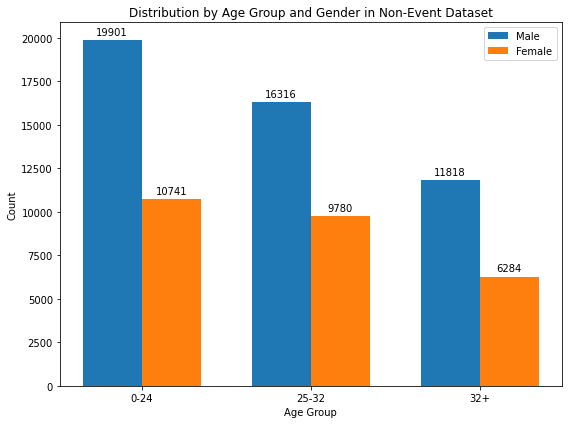

In [66]:
labels = ['0-24', '25-32', '32+']
nev_males = nev_males.tolist()
nev_femals = nev_females.tolist()
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x - width/2, nev_males, width, label='Male')
rects2 = ax.bar(x + width/2, nev_females, width, label='Female')
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Distribution by Age Group and Gender in Non-Event Dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()        

#### 3.1.2 Event dataset

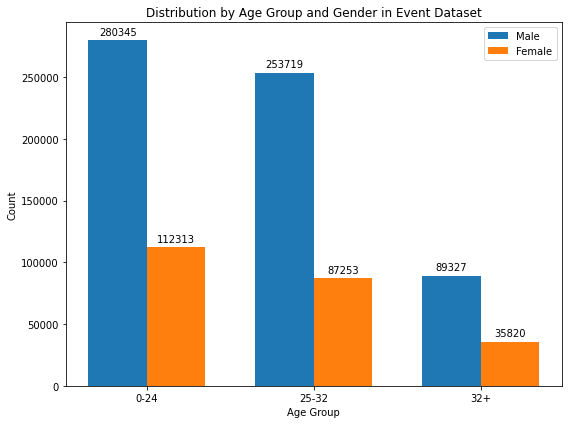

In [67]:
labels = ['0-24', '25-32', '32+']
ev_males = ev_males.tolist()
ev_femals = ev_females.tolist()
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x - width/2, ev_males, width, label='Male')
rects2 = ax.bar(x + width/2, ev_females, width, label='Female')
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Distribution by Age Group and Gender in Event Dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()       

#### 4.2 Boxplot analysis for gender and Age [Bivariate]

#### 4.2.1 Non-Event dataset

In [68]:
# Printing the statistics for non-event data set
# with Gender == Female
# 
df_tmp1 =  dfnev.loc[dfnev.gender=='F']
df_tmp1['age'].describe()

count    26805.000000
mean        32.051483
std         10.539238
min         10.000000
25%         25.000000
50%         29.000000
75%         37.000000
max         96.000000
Name: age, dtype: float64

In [69]:
# Printing the statistics for non-event data set 
# with Gender == Male
# 
df_tmp2 =  dfnev.loc[dfnev.gender=='M']
df_tmp2['age'].describe()

count    48035.000000
mean        31.048798
std          9.452689
min          1.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         90.000000
Name: age, dtype: float64

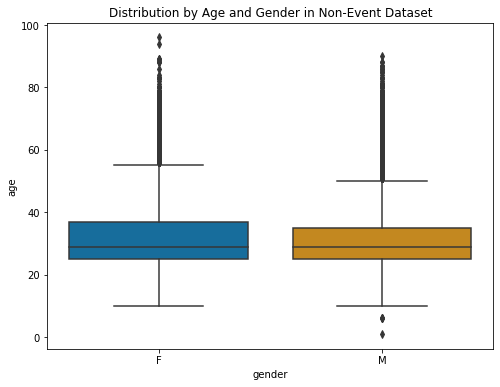

In [70]:
plt.figure(figsize=(8,6))
sns.boxplot(y='age', x='gender', 
                 data=dfnev, 
                 palette='colorblind'                 
            )
plt.title('Distribution by Age and Gender in Non-Event Dataset')
plt.show()

#### 4.2.2 Event Dataset

In [71]:
# Printing the statistics for event data set
# with Gender == Female
# 
df_tmp3 =  dfev.loc[dfev.gender=='F']
df_tmp3['age'].describe()

count    235386.000000
mean         34.362940
std          10.604955
min          16.000000
25%          27.000000
50%          32.000000
75%          41.000000
max          86.000000
Name: age, dtype: float64

In [72]:
# Printing the statistics for event data set
# with Gender == Male
# 
df_tmp4 =  dfev.loc[dfev.gender=='M']
df_tmp4['age'].describe()

count    623391.000000
mean         33.337809
std           9.393527
min          14.000000
25%          27.000000
50%          31.000000
75%          38.000000
max          88.000000
Name: age, dtype: float64

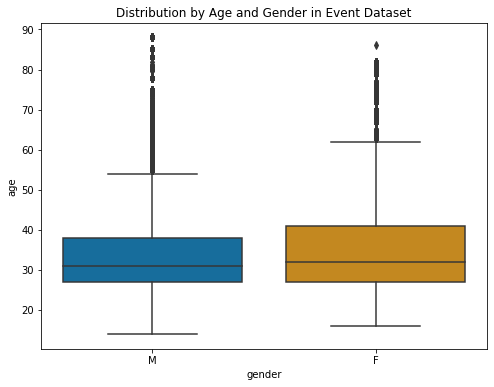

In [73]:
plt.figure(figsize=(8,6))
sns.boxplot(y='age', x='gender', 
                 data=dfev, 
                 palette='colorblind'                 
            )
plt.title('Distribution by Age and Gender in Event Dataset')
plt.show()

#### 4.3. Plot percentage of device_ids with and without event data 

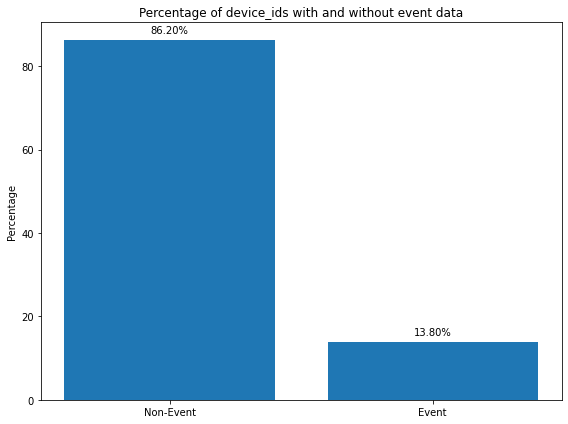

In [74]:
nev_deviceid_count = dfnev['device_id'].unique().size
ev_deviceid_count = dfev['device_id'].unique().size
total_devices_cnt = nev_deviceid_count + ev_deviceid_count
fig, ax = plt.subplots(figsize=(8,6))
labels = ['Non-Event', 'Event']
device_perc = [(nev_deviceid_count/total_devices_cnt)*100, (ev_deviceid_count/total_devices_cnt)*100]
ax.bar(labels,device_perc)
plt.title('Percentage of device_ids with and without event data')
plt.ylabel('Percentage')

plt.annotate('{:.2f}'.format(device_perc[0])+'%', # this is the text
             (0,device_perc[0]), # this is the point to label
             textcoords="offset points", # how to position the text
             xytext=(0,10), # distance from text to points (x,y)
             ha='center', # horizontal alignment
             va = 'center') # vertica alignment
plt.annotate('{:.2f}'.format(device_perc[1])+'%', # this is the text
             (1,device_perc[1]), # this is the point to label
             textcoords="offset points", # how to position the text
             xytext=(0,10), # distance from text to points (x,y)
             ha='center', # horizontal alignment
             va = 'center') # vertica alignment
fig.tight_layout()
plt.show()     

#### 4.4 Graph representing the distribution of events on different days of a week 

In [75]:
dfev.head(5)

,device_id,event_id,event_time,latitude,longitude,gender,age,group_train
0,4676982795249940000,2958924,2016-05-01 22:03:46,113.24,22.85,M,52,M32+
1,4782582047729160000,2958931,2016-05-01 22:24:09,114.47,38.03,M,36,M32+
2,2181284491650730000,2958933,2016-05-01 22:24:44,125.66,43.02,M,28,M25-32
3,4221762657972680000,2958935,2016-05-01 22:40:47,115.19,24.07,F,19,F0-24
5,-6242501228649110000,2958939,2016-05-01 21:59:40,111.21,27.85,M,20,M0-24


In [76]:
days_of_week = pd.to_datetime(dfev['event_time'], format='%Y-%m-%d').dt.day_name()
pd.Categorical(days_of_week, categories=['Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],
    ordered=True).value_counts()

Sunday       115984
Monday       120617
Tuesday      128733
Wednesday    127601
Thursday     127299
Friday       122047
Saturday     116496
dtype: int64

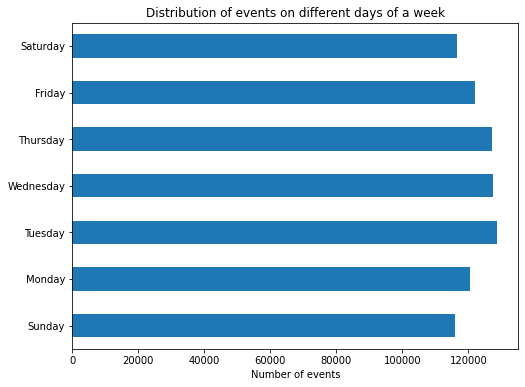

In [66]:
# Week days are categorised using pd.Categorical then sorted
# 
plt.figure(figsize=(8,6))
days_of_week = pd.to_datetime(dfev['event_time'], format='%Y-%m-%d').dt.day_name()
pd.Categorical(days_of_week, categories=['Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],
    ordered=True).value_counts().plot(kind='barh')
plt.title('Distribution of events on different days of a week')
plt.xlabel('Number of events')
plt.show()

#### 4.5 Graph representing the distribution of events per hour [ For one-week data]

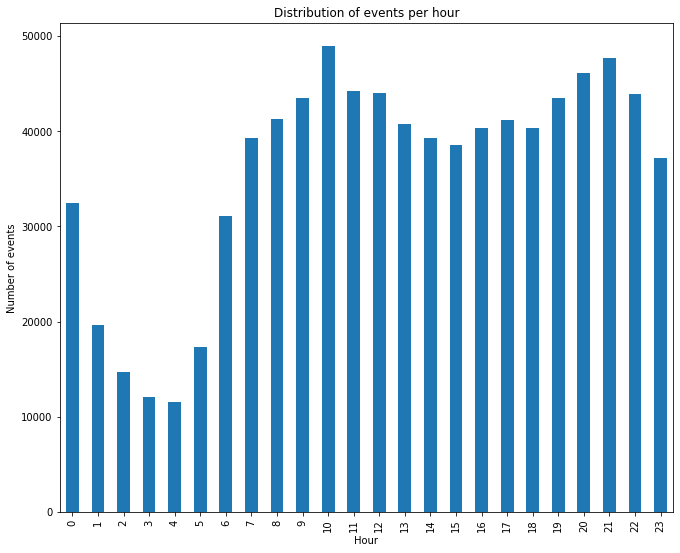

In [77]:
#whole dataset is covered, not just one-week data
plt.figure(figsize=(11,9))
event_hours = pd.to_datetime(dfev['event_time']).dt.hour
event_hours.value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of events per hour')
plt.ylabel('Number of events')
plt.xlabel('Hour')
plt.show()

#### 4.6 The difference in the distribution of events per hour for Male and Females?  [Show the difference using an appropriate chart for one-week data]

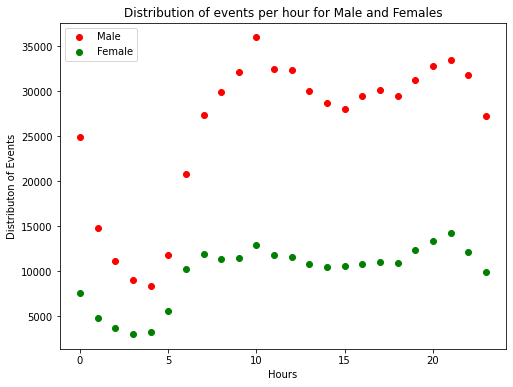

In [78]:
fig, ax = plt.subplots(figsize=(8,6))
dfmale = dfev.loc[(dfev.gender == 'M')]
dffemale = dfev.loc[(dfev.gender == 'F')]
male_ev_hrs = pd.to_datetime(dfmale['event_time']).dt.hour
male_ev_hrs = male_ev_hrs.value_counts().sort_index()
female_ev_hrs = pd.to_datetime(dffemale['event_time']).dt.hour
female_ev_hrs = female_ev_hrs.value_counts().sort_index()
hours_range = male_ev_hrs.index.tolist()
x = male_ev_hrs.values.tolist()
y = female_ev_hrs.values.tolist()
plt.scatter(hours_range, x, color='r', label='Male')
plt.scatter(hours_range, y, color='g', label='Female')
plt.title('Distribution of events per hour for Male and Females')
plt.xlabel('Hours')
plt.ylabel('Distributon of Events')
plt.legend()
plt.show()

#### 4.7 Is there any difference in the distribution of Events for different Age Groups over different days of the week? [Consider the age groups as 0-24, 25-32, 33-45, 46+]

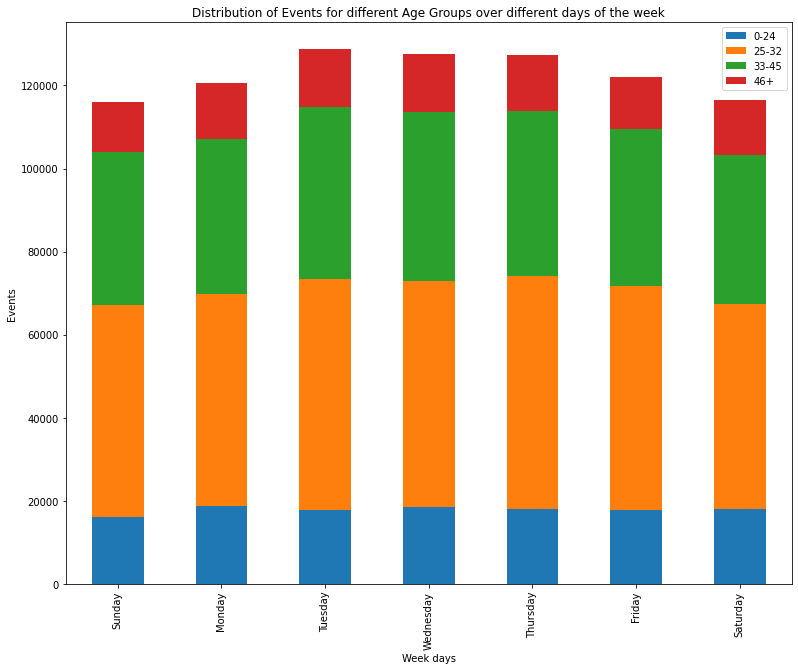

In [79]:
#dfev.groupby([pd.to_datetime(dfev['event_time'], format='%Y-%m-%d').dt.day_name(), 'group_train']).size().unstack().plot(kind='barh', stacked=True)
# 
dfsubset = dfev[['age','event_time']]
age_bins = pd.cut(dfsubset['age'], bins=[0, 24, 33, 46,100],labels=['0-24','25-32','33-45','46+'])
week_days = pd.Categorical(pd.to_datetime(dfsubset['event_time'], format='%Y-%m-%d').dt.day_name(),categories=['Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],
    ordered=True)
grouped = dfsubset.groupby([week_days, age_bins])
fig, ax1 = plt.subplots(figsize=(11,9))
grouped.size().unstack().plot(kind='bar', stacked=True, ax = ax1)
fig.tight_layout()
plt.title('Distribution of Events for different Age Groups over different days of the week')
plt.xlabel('Week days')
plt.ylabel('Events')
plt.legend()
plt.show()

#### 4.8.Stacked bar chart for top 10 mobile brands across male and female consumers

In [80]:
# Feeling the dataset before plot - part #1
#
dfsubset = dfnev[['phone_brand','gender']]
grouped = dfsubset.groupby(['phone_brand', 'gender'])['phone_brand'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(18)
grouped.sort_values(by=['count'], ascending=False)

,phone_brand,gender,count
66,Xiaomi,M,11407
20,Huawei,M,8744
160,samsung,M,8263
65,Xiaomi,F,5930
159,samsung,F,5443
19,Huawei,F,4257
38,Meizu,M,3404
44,OPPO,M,3221
164,vivo,M,2998
163,vivo,F,2660


In [81]:
# Feeling the dataset before plot - part #2
#
dfsubset = dfnev[['phone_brand','gender']]
grouped = dfsubset.groupby(['phone_brand', 'gender'])['phone_brand'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(18)
grouped.sort_values(by=['phone_brand'], ascending=False)

,phone_brand,gender,count
163,vivo,F,2660
164,vivo,M,2998
160,samsung,M,8263
159,samsung,F,5443
121,lenovo,F,894
122,lenovo,M,1801
66,Xiaomi,M,11407
65,Xiaomi,F,5930
44,OPPO,M,3221
43,OPPO,F,2581


In [82]:
dfsubset = dfnev[['phone_brand','gender']]
dfsubset[dfsubset['phone_brand']=='HTC']['gender'].value_counts()

M    694
F    321
Name: gender, dtype: int64

In [83]:
dfsubset = dfnev[['phone_brand','gender']]
dfsubset[dfsubset['phone_brand']=='Gionee']['gender'].value_counts()

M    721
F    403
Name: gender, dtype: int64

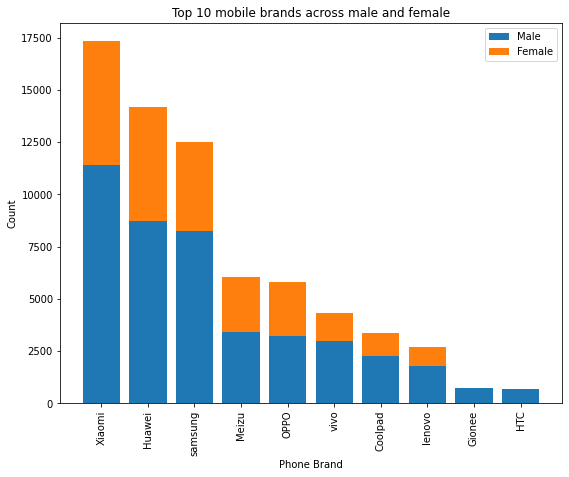

In [84]:
N = 10
ind = np.arange(N)    # the x locations for the groups
male_list = grouped[grouped.gender == 'M']['count'].tolist()
female_list = grouped[grouped.gender == 'F']['count'].tolist()
female_list.append(0)      #Gionee not available for Female in top 10, hence mark 0 for Gionee-Female
female_list.append(0)      #HTC not available for Female in top 10 , hence mark 0 for HTC-Female
phone_list = grouped.phone_brand.unique().tolist()
plt.figure(figsize=(9,7))
p1 = plt.bar(ind, male_list, label='Male')
p2 = plt.bar(ind, female_list, bottom=male_list,label='Female')
plt.title('Top 10 mobile brands across male and female')
plt.xlabel('Phone Brand')
plt.ylabel('Count')
plt.xticks(ind, phone_list, rotation=90)
plt.legend()
plt.show()

#### 4.9 Chart representing ten frequent applications and their respective male and female percentage

In [85]:
#feel the dataset before plotting.
dfevsub = dfev[['event_id','gender']]
dfappsub = dfapp[['event_id','app_id']]
dfjoin = pd.merge(dfevsub, dfappsub, how='inner', on='event_id')
dfjoin = dfjoin.drop_duplicates()
grouped = dfjoin.groupby(['app_id', 'gender'])['app_id'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(11)
#grouped.sort_values(by=['app_id', 'count'], ascending=[True, False])
grouped.sort_values(by=['count'], ascending=False)
#observation
#===========
#app_id 5927333115845830913 'F' is not available
#app_id 4348659952760821294 'F' is not available
#app_id 628020936226491308 'F' is not available
#app_id 3433289601737013244 'F' is not available
#app_id 7348340405200054701 'F' is not available
#app_id 6284164581582112235 'F' is not available
#app_id -5368809411346728624 'F' is not available
#app_id 8948670408023620661 'F' is not available
#app_id 5729517255058371973 'F' is not available

,app_id,gender,count
12736,8693964245073640147,M,32636
10343,5927333115845830913,M,25785
9353,4348659952760821294,M,25195
6991,628020936226491308,M,18994
8826,3433289601737013244,M,13974
11859,7348340405200054701,M,11191
12735,8693964245073640147,F,10559
10645,6284164581582112235,M,9654
2405,-5368809411346728624,M,9381
12899,8948670408023620661,M,9119


In [86]:
#add the missing appids and respective gender with count as 0
missing_appids = [pd.Series([5927333115845830913, 'F', 0],index=grouped.columns), 
                       pd.Series([4348659952760821294, 'F', 0],index=grouped.columns), 
                       pd.Series([628020936226491308, 'F', 0],index=grouped.columns), 
                       pd.Series([3433289601737013244, 'F', 0],index=grouped.columns), 
                       pd.Series([7348340405200054701, 'F', 0],index=grouped.columns), 
                       pd.Series([6284164581582112235, 'F', 0],index=grouped.columns), 
                       pd.Series([-5368809411346728624, 'F', 0],index=grouped.columns), 
                       pd.Series([8948670408023620661, 'F', 0],index=grouped.columns),
                       pd.Series([5729517255058371973, 'F', 0],index=grouped.columns)
                      ]
grouped = grouped.append(missing_appids, ignore_index=True)

In [87]:
grouped.sort_values(by=['app_id'])

,app_id,gender,count
17,-5368809411346728624,F,0
8,-5368809411346728624,M,9381
3,628020936226491308,M,18994
13,628020936226491308,F,0
4,3433289601737013244,M,13974
14,3433289601737013244,F,0
2,4348659952760821294,M,25195
12,4348659952760821294,F,0
19,5729517255058371973,F,0
10,5729517255058371973,M,9088


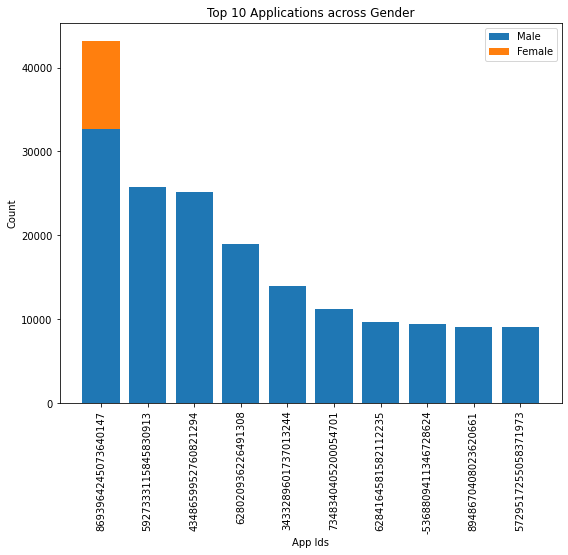

In [88]:
#now plot the chart
N = 10
ind = np.arange(N)    # the x locations for the groups
appid_list = grouped.app_id.unique().tolist()
g1 = np.array(grouped[grouped.gender == 'M']['count'].tolist())
g2 = np.array(grouped[grouped.gender == 'F']['count'].tolist())
#print('appid_list=',appid_list)
#print('g1=',g1)
#print('g2=',g2)
plt.figure(figsize=(9,7))
p1 = plt.bar(ind, g1, label='Male')
p2 = plt.bar(ind, g2, bottom=sum([g1]),label='Female')
plt.title('Top 10 Applications across Gender')
plt.xlabel('App Ids')
plt.ylabel('Count')
plt.xticks(ind, appid_list, rotation=90)
plt.legend()
plt.show()

In [89]:
import warnings
import numpy as np
warnings.simplefilter(action='ignore', category=FutureWarning)
dfapp.loc[dfapp['app_id']=='8693964245073640147']

,event_id,app_id,is_installed,is_active,label_id,category


#### 4.10 Top 10  Mobile Phone Brand  by age groups [Consider the age groups as 0-24, 25-32, 33-45, 46+]

In [90]:
#feel the dataset before plotting.
dfsubset = dfnev[['age','phone_brand']]
age_bins = pd.cut(dfsubset['age'], bins=[0, 24, 33, 46,100],labels=['0-24','25-32','33-45','46+'])
grouped = dfsubset.groupby(['phone_brand', age_bins])['phone_brand'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(29)
grouped.sort_values(by=['phone_brand'])
#observation
#===========
#Coolpad - Age group '46+' is not available
#Gionee - Age group '0-24','33-45','46+' is not available
#HTC - Age group '0-24','33-45','46+' is not available
#Meizu - Age group '46+' is not available
#OPPO - Age group '46+' is not available
#lenovo - Age group '46+' is not available
#vivo - Age group '46+' is not available

,phone_brand,age,count
24,Coolpad,0-24,811
26,Coolpad,33-45,881
25,Coolpad,25-32,1324
37,Gionee,25-32,414
41,HTC,25-32,474
45,Huawei,25-32,5641
47,Huawei,46+,1235
46,Huawei,33-45,3676
44,Huawei,0-24,2449
86,Meizu,33-45,612


In [91]:
#Add the missing phone brands & age group into the dataframe with count 0
missing_phonebrands = [pd.Series(['Coolpad', '46+', 0],index=grouped.columns), 
                       pd.Series(['Gionee', '0-24', 0],index=grouped.columns), 
                       pd.Series(['Gionee', '33-45', 0],index=grouped.columns), 
                       pd.Series(['Gionee', '46+', 0],index=grouped.columns), 
                       pd.Series(['HTC', '0-24', 0],index=grouped.columns), 
                       pd.Series(['HTC', '33-45', 0],index=grouped.columns), 
                       pd.Series(['HTC', '46+', 0],index=grouped.columns), 
                       pd.Series(['Meizu', '46+', 0],index=grouped.columns), 
                       pd.Series(['OPPO', '46+', 0],index=grouped.columns), 
                       pd.Series(['lenovo', '46+', 0],index=grouped.columns), 
                       pd.Series(['vivo', '46+', 0],index=grouped.columns)                       
                      ]
grouped = grouped.append(missing_phonebrands, ignore_index=True)

In [92]:
grouped.sort_values(by=['phone_brand','count'], ascending=[True, False])

,phone_brand,age,count
17,Coolpad,25-32,1324
22,Coolpad,33-45,881
23,Coolpad,0-24,811
29,Coolpad,46+,0
28,Gionee,25-32,414
30,Gionee,0-24,0
31,Gionee,33-45,0
32,Gionee,46+,0
27,HTC,25-32,474
33,HTC,0-24,0


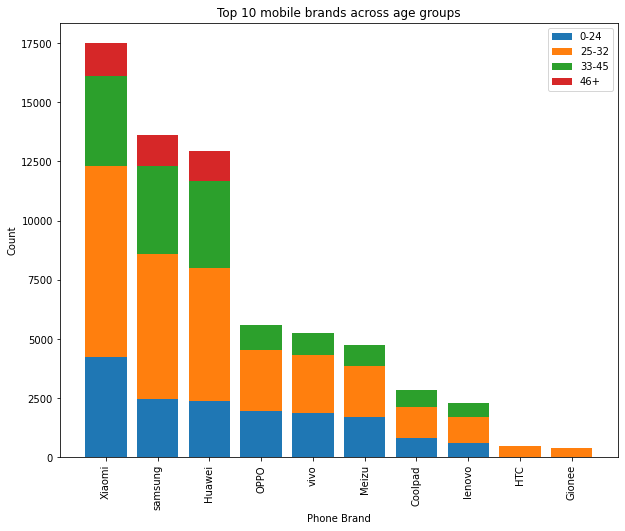

In [93]:
#now plot the chart
N = 10
ind = np.arange(N)    # the x locations for the groups
phone_list = grouped.phone_brand.unique().tolist()
g1 = np.array(grouped[grouped.age == '0-24']['count'].tolist())
g2 = np.array(grouped[grouped.age == '25-32']['count'].tolist())
g3 = np.array(grouped[grouped.age == '33-45']['count'].tolist())
g4 = np.array(grouped[grouped.age == '46+']['count'].tolist())

plt.figure(figsize=(10,8))
p1 = plt.bar(ind, g1, label='0-24')
p2 = plt.bar(ind, g2, bottom=sum([g1]),label='25-32')
p3 = plt.bar(ind, g3, bottom=sum([g1, g2]),label='33-45')
p4 = plt.bar(ind, g4, bottom=sum([g1, g2, g3]),label='46+')
plt.title('Top 10 mobile brands across age groups')
plt.xlabel('Phone Brand')
plt.ylabel('Count')
plt.xticks(ind, phone_list, rotation=90)
plt.legend()
plt.show()

### Export Event, Non-event and Appdata dataframe to csv, then upload to S3 bucket

In [94]:
#save non-event dataframe to csv
dfnev.to_csv(r'non_events_init.csv', index = False)

In [95]:
#save event dataframe to csv
dfev.to_csv(r'events_init.csv', index = False)

In [96]:
#save app dataframe to csv
dfapp.to_csv(r'appdata_init.csv', index = False)

In [97]:
#upload non_events csv to S3
!aws s3 cp non_events_init.csv s3://capstone-sanjanameghna/final_submission/non_events_init.csv

upload: ./non_events_init.csv to s3://capstone-sanjanameghna/final_submission/non_events_init.csv


In [98]:
#upload events csv to S3
!aws s3 cp events_init.csv s3://capstone-sanjanameghna/final_submission/events_init.csv

upload: ./events_init.csv to s3://capstone-sanjanameghna/final_submission/events_init.csv


In [99]:
#upload appdate csv to S3
!aws s3 cp appdata_init.csv s3://capstone-sanjanameghna/final_submission/appdata_init.csv

upload: ./appdata_init.csv to s3://capstone-sanjanameghna/final_submission/appdata_init.csv
